In [2]:
from dust_extinction.parameter_averages import CCM89, F99
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
from scipy.optimize import curve_fit
from astropy import units as u
from specutils import Spectrum1D
import numpy as np
import matplotlib.pyplot as plt
def model_4gauss(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,x):
    '''
    Fit 4 Gaussian model
    '''
    model = a1*np.exp(-(x-a2)**2/(2*a3**2))+a4*np.exp(-(x-a5)**2/(2*a6**2))+a7*np.exp(-(x-a8)**2/(2*a9**2))+a10*np.exp(-(x-a11)**2/(2*a12**2))
    return model
data=np.loadtxt('2020ywx_20220429.txt')
data[:,0]/=1.0217
l=data[:,0]
f=data[:,1]
e=data[:,2]

par


/Users/bek5cw/anaconda3/lib/python3.11/site-packages/dust_extinction/helpers.py:30: UserWarning: x has no units, assuming x units are inverse microns
  warnings.warn(
/Users/bek5cw/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Flux')

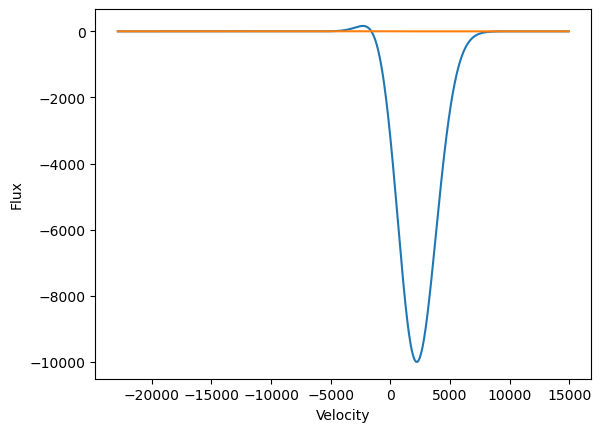

In [3]:
Rv=3.1
Ebv=0.023
lambda_pm=500
ext = F99(Rv=Rv)#set extinction with model from Fitzpatrick 1999
f/=ext.extinguish(l/1e4,Ebv=Ebv)# do dust extinction
line_value=6563#get relevant wavelength
xfit=l[np.where((l>(line_value-lambda_pm))&(l<(line_value+lambda_pm)))]#get a subset of the wavelength around the line-don't fit the whole spectrum
yfit=f[np.where((l>(line_value-lambda_pm))&(l<(line_value+lambda_pm)))]#get a subset of the flux around the line
region=SpectralRegion((line_value-(lambda_pm/5))*u.nm, (line_value+(lambda_pm/5))*u.nm)# start fitting continuum with astropy
spectrum = Spectrum1D(flux=f*u.Jy, spectral_axis=l*u.nm)
g1_fit = fit_generic_continuum(spectrum,exclude_regions=region)#fit the whole spectrum-but exclude the relevant emission line
y_continuum_fitted = g1_fit(l*u.nm)
ynew=np.array(y_continuum_fitted)[np.where((l>line_value-lambda_pm)&(l<line_value+lambda_pm))]# now filter the continuum solution to relevant values
x=3e5*(xfit-line_value)/(line_value)
y=yfit-ynew
yerr=e[np.where((l>line_value-lambda_pm)&(l<line_value+lambda_pm))]
#p0=[0.2,-740,1500,1.42,-500,800,0.8,100,50,0.1,1000,115] 
p0=[1.75345776e-01, -9.68191362e+02, 2.23732584e+03, 1.56171755e+00,-3.98028467e+02,8.48422948e+02, 6.50466762e-01, 9.73341801e+01,4.51399033e+01,1.52263013e-01,1.01900298e+03,7.00741414e+01]
par,cov=curve_fit(model_4gauss,x,y,p0,yerr)
print('par')
plt.plot(x,model_4gauss(*par,x))
plt.plot(x,y)
plt.xlabel('Velocity')
plt.ylabel('Flux')